## Handwashing - A Simple Way to Save Lives

In Vienna in the 1840s the rate of dath from childbirth was aroung 10% which alarmed Dr. Ignaz Semmelweis. Dr. Semmelweis believed that women dying from childbed fever being caused by the contamintated hands of doctors delivering babies. 

The first dataset being imported for analysis details the years, number of births and deaths, and the clinic where the birth and deaths occured.

In [2]:
# importing modules
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv("datasets/yearly_deaths_by_clinic.csv")

# Print out yearly
# ... YOUR CODE FOR TASK 1 ...
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


## Alarming number of deaths 

From the outputted table we can se the number of deaths from childbirth are alarming. To gain better perpective it is best to look rather at the deaths as a proportion of the number of births. 

When looking at deaths as a proportion of births we can see that anywhere from 2% to 15% of women were dying during childbirth

In [5]:
# Calculate proportion of deaths per no. births
# ... YOUR CODE FOR TASK 2 ...
yearly["proportion_deaths"] = yearly["deaths"]/yearly["births"]

# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = yearly[yearly["clinic"]=="clinic 1"]
yearly2 = yearly[yearly["clinic"]=="clinic 2"]

# Print out yearly1
# ... YOUR CODE FOR TASK 2 ...
print(yearly1)
print(yearly2)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464
    year  births  deaths    clinic  proportion_deaths
6   1841    2442      86  clinic 2           0.035217
7   1842    2659     202  clinic 2           0.075968
8   1843    2739     164  clinic 2           0.059876
9   1844    2956      68  clinic 2           0.023004
10  1845    3241      66  clinic 2           0.020364
11  1846    3754     105  clinic 2           0.027970


## Comparing Clinics

Plotting the proportion of daths for both clinics will give us a visual representation, allowing us to easily se that the proportion of daths at clinic 2 seem to be lower than those at clinic 1.

Text(0, 0.5, 'Proportion Deaths')

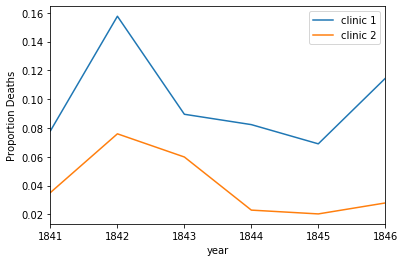

In [8]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
# ... YOUR CODE FOR TASK 3 ...
ax = yearly1.plot(x="year", y="proportion_deaths", label = "clinic 1")
yearly2.plot(x="year", y="proportion_deaths", label = "clinic 2", ax = ax)
ax.set_ylabel("Proportion Deaths")

## Why?

Dr. Semmelweis wondered about the difference in daths between clinics. He knew that Clinicl was mostly staffed by medical students, while mostly midwives worked at clinic 2. He also know that midwives only worked with women giving birth whereas medical students wer known to do autopsy exams with corpses.

Dr. Sammelweis hypothesized that some "unknown" substance was being transfered from th corpses to the women via the Dr's hands during delivery. That unknown substance is what we know today to be bacteria.

His solution? For doctors to wash their hands. 

In [9]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv("datasets/monthly_deaths.csv", parse_dates=["date"])

# Calculate proportion of deaths per no. births
# ... YOUR CODE FOR TASK 4 ...
monthly["proportion_deaths"] = monthly["deaths"]/monthly["births"]

# Print out the first rows in monthly
# ... YOUR CODE FOR TASK 4 ...
monthly.head(4)

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686


Text(0, 0.5, 'Proportion Deaths')

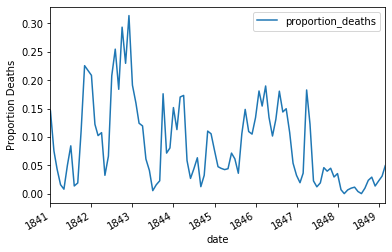

In [10]:
# Plot monthly proportion of deaths
ax = monthly.plot( x= "date", y = "proportion_deaths")
ax.set_ylabel("Proportion Deaths")
# ... YOUR CODE FOR TASK 5 ...

## Is Handwashing Effective?

The above plot shows the proportion of deaths against date. A significant frop can be seen to happen between 1847 and 1848. This is precisely when Dr. Sammelweis made handwashing mandatory.

Text(0, 0.5, 'Proportion Deaths')

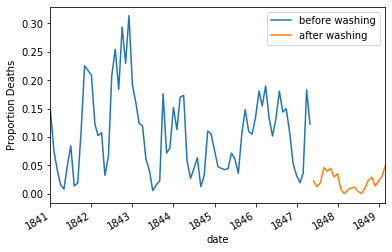

In [11]:
# Date when handwashing was made mandatory
import pandas as pd
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date']<handwashing_start]
after_washing = monthly[monthly['date']>=handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
# ... YOUR CODE FOR TASK 6 ...
ax = before_washing.plot(x="date", y="proportion_deaths", label = "before washing")
after_washing.plot(x="date", y="proportion_deaths", label = "after washing", ax = ax)
ax.set_ylabel("Proportion Deaths")

## How Many Lives did Handwashing Save?

The mean proportion of deaths after handwashing was made mandatory was about 8% less that previously. 

In [12]:
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean()-before_proportion.mean()
mean_diff

-0.0839566075118334

## Bootstrapping
Bootstrapping is used ot make in inference about an estimate, in our casse the sameple mean, for a population parameter on sample data. It is done by independent resampling with replacement from existing sample data. Then a confidence intrval is calculated to summarize the results.

In [13]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean()-boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101415
0.975   -0.067648
dtype: float64

## Conclusion

In our case it seems as though the introduction of Handwashing led to a reduction in the proportion of deaths anywhere between 6.7% to 10.1%. 